## US House Price Prediction 
#### The main aim of this project is to predict the house price based on various features 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset (1.4 M records x 10 columns)

In [2]:
house_df = pd.read_csv('realtor-data.csv')
house_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [3]:
house_df.shape

(1401066, 10)

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


In [5]:
house_df.describe(include='object')

,status,city,state,prev_sold_date
count,1401066,1400875,1401066,714773
unique,2,3512,19,10319
top,for_sale,New York City,New York,2022-04-15
freq,1399134,61299,653061,734


In [6]:
house_df.describe(include='number').round(2)

,bed,bath,acre_lot,zip_code,house_size,price
count,1184538.00,1206853.00,1043599.00,1400587.00,950954.00,1.400958e+06
mean,3.39,2.49,32.15,8356.64,2178.64,8.186029e+05
std,2.05,1.87,1249.98,4130.46,3492.62,2.683069e+06
min,1.00,1.00,0.00,601.00,4.00,0.000000e+00
25%,2.00,2.00,0.12,5652.00,1170.00,2.350000e+05
50%,3.00,2.00,0.32,8757.00,1700.00,4.467770e+05
75%,4.00,3.00,1.34,11426.00,2500.00,7.950000e+05
max,123.00,198.00,100000.00,99999.00,1450112.00,8.750000e+08


### Data Preprocessing

In [7]:
house_df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [8]:
# Renaming Columns
house_df.rename(columns={'acre_lot':'acre', 'zip_code':'zip', 'house_size': 'size', 'prev_sold_date':'last_sold_date'}, inplace=True)

#### duplicated values

In [9]:
house_df.isna().sum()

status                 0
bed               216528
bath              194213
acre              357467
city                 191
state                  0
zip                  479
size              450112
last_sold_date    686293
price                108
dtype: int64

In [10]:
# percentage of missing values for each column 
for col in house_df.isna():
    print(f'{col} : {np.round(house_df[col].isna().sum() / house_df.shape[0] * 100, 4)} %')


status : 0.0 %
bed : 15.4545 %
bath : 13.8618 %
acre : 25.5139 %
city : 0.0136 %
state : 0.0 %
zip : 0.0342 %
size : 32.1264 %
last_sold_date : 48.9836 %
price : 0.0077 %


In [11]:
house_df[['bed','bath','acre']].mode()

,bed,bath,acre
0,3.0,2.0,0.06


In [12]:
house_df['size'].mode()

0    1200.0
Name: size, dtype: float64

In [13]:
house_df['bed'].fillna(house_df['bed'].mode()[0], inplace=True)
house_df['bath'].fillna(house_df['bath'].mode()[0], inplace=True)
house_df['acre'].fillna(house_df['acre'].mode()[0], inplace=True)
house_df['size'].fillna(house_df['size'].mode()[0], inplace=True)

In [14]:
house_df.dropna(subset=['city','zip'], inplace= True)

In [15]:
house_df.drop(columns='last_sold_date', inplace = True)

In [16]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400499 entries, 0 to 1401065
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   status  1400499 non-null  object 
 1   bed     1400499 non-null  float64
 2   bath    1400499 non-null  float64
 3   acre    1400499 non-null  float64
 4   city    1400499 non-null  object 
 5   state   1400499 non-null  object 
 6   zip     1400499 non-null  float64
 7   size    1400499 non-null  float64
 8   price   1400426 non-null  float64
dtypes: float64(6), object(3)
memory usage: 106.8+ MB


#### Handling Outlier

In [17]:
house_df.dtypes[house_df.dtypes != object]

bed      float64
bath     float64
acre     float64
zip      float64
size     float64
price    float64
dtype: object

In [18]:
house_df.describe(include = 'number').round(2)

,bed,bath,acre,zip,size,price
count,1400499.00,1400499.00,1400499.00,1400499.00,1400499.00,1.400426e+06
mean,3.33,2.42,23.97,8356.22,1864.45,8.187839e+05
std,1.89,1.75,1079.11,4128.23,2914.02,2.683550e+06
min,1.00,1.00,0.00,601.00,4.00,0.000000e+00
25%,2.00,2.00,0.06,5652.00,1200.00,2.350000e+05
50%,3.00,2.00,0.17,8757.00,1200.00,4.470000e+05
75%,4.00,3.00,0.79,11426.00,2064.00,7.950000e+05
max,123.00,198.00,100000.00,99999.00,1450112.00,8.750000e+08


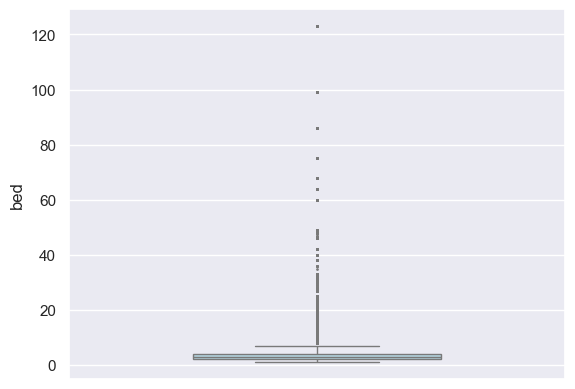

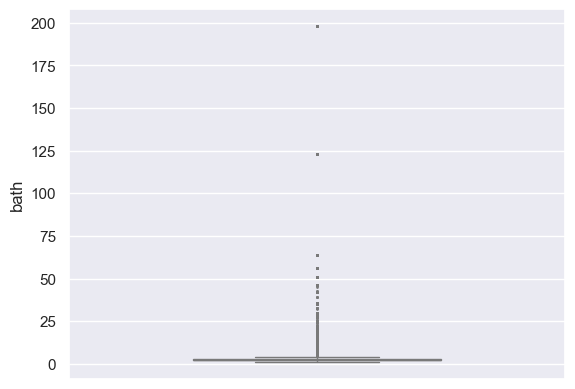

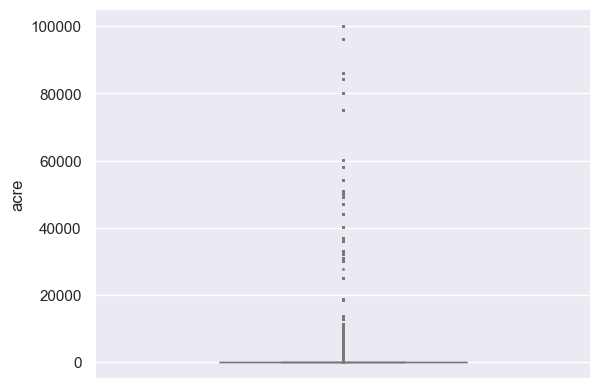

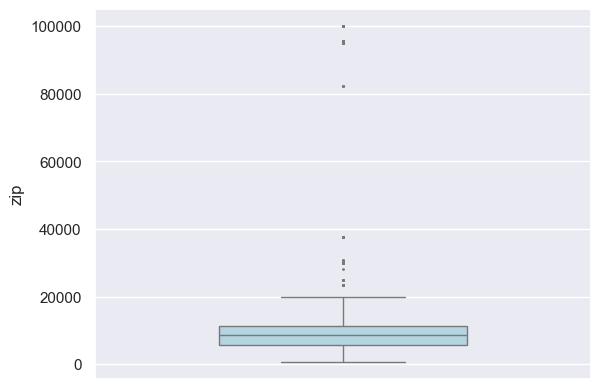

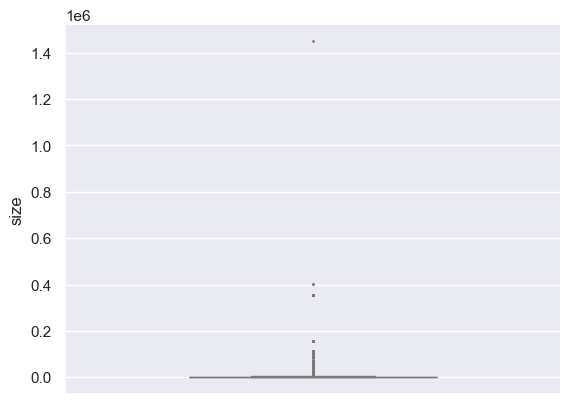

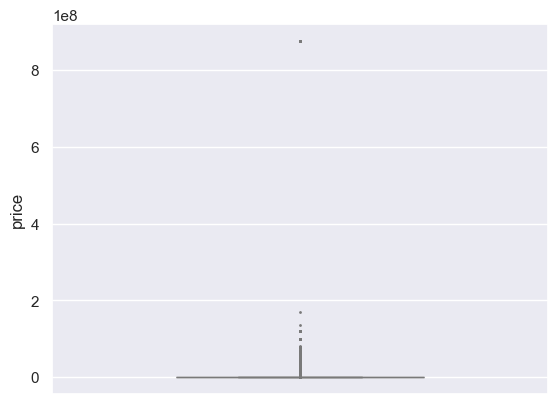

In [19]:
for col in house_df.dtypes[house_df.dtypes != object].index:
    sns.boxplot(house_df[col], color='lightblue', width=0.5, fliersize=1)
    plt.show()

In [20]:
house_df.shape

(1400499, 9)

In [21]:
# Removing outliers
for col in house_df.dtypes[house_df.dtypes != object].index:
    IQR = house_df[col].quantile(0.75) - house_df[col].quantile(0.25)
    lower_limit = house_df[col].quantile(0.25) - (IQR * 1.5)
    upper_limit = house_df[col].quantile(0.75) + (IQR * 1.5)
    house_df = house_df[(house_df[col] > lower_limit) & (house_df[col] < upper_limit)]

house_df.shape

(926100, 9)

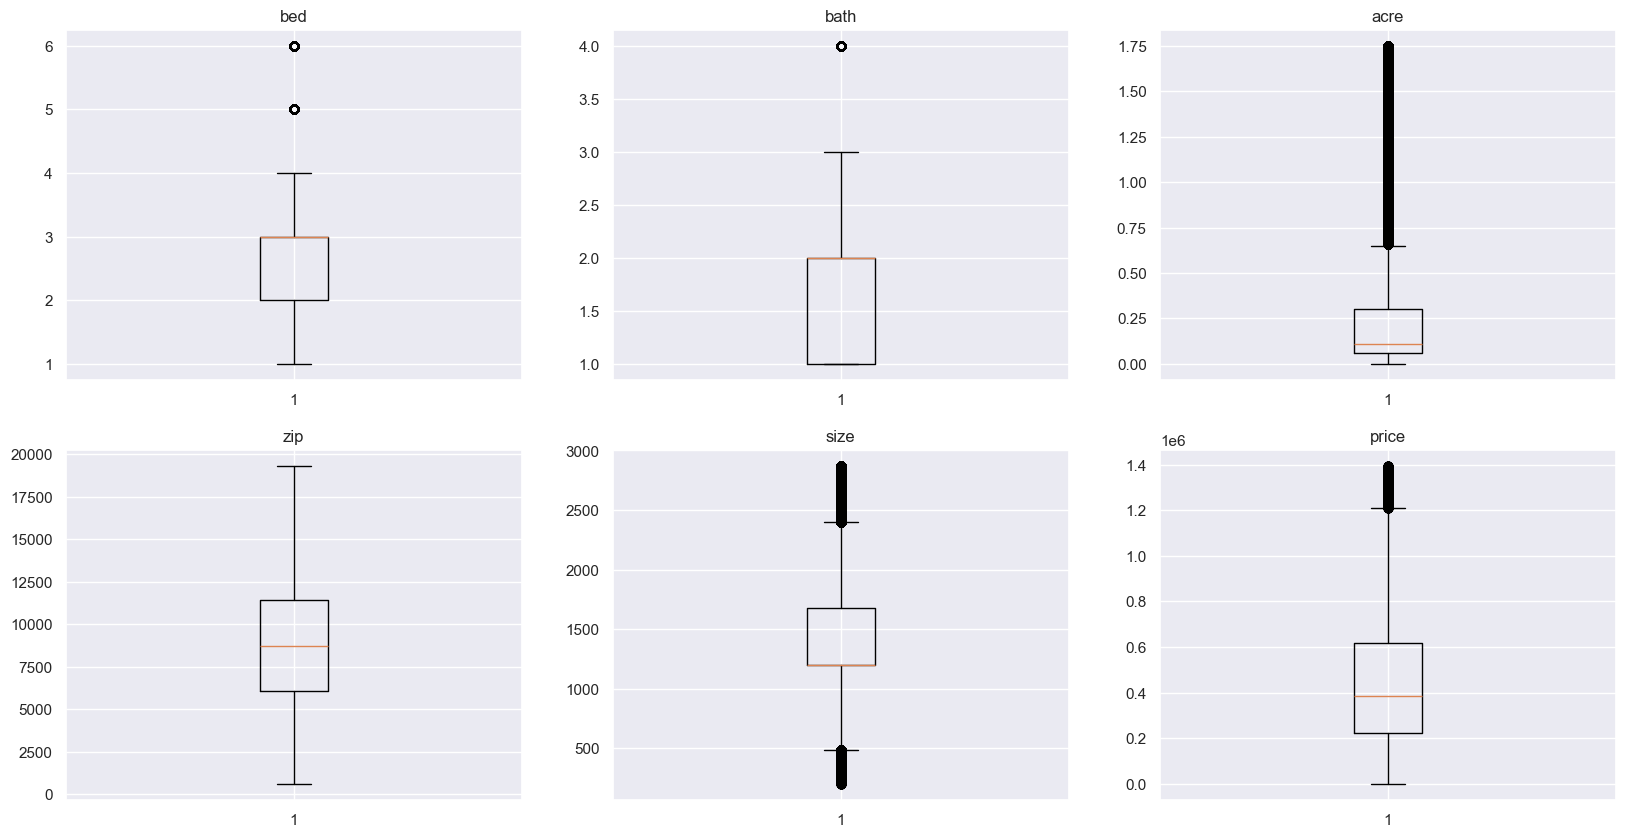

In [22]:
# plot boxplot for numercial features

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(house_df.dtypes[house_df.dtypes != object].index):
    r = i // 3
    c = i % 3
    ax[r, c].boxplot(house_df[col])
    ax[r, c].set_title(col)

In [23]:
house_df.describe(include = 'number').round(2)

,bed,bath,acre,zip,size,price
count,926100.00,926100.00,926100.00,926100.00,926100.00,926100.00
mean,2.90,1.98,0.26,8409.12,1404.64,444714.90
std,1.12,0.81,0.34,3997.22,507.16,291607.05
min,1.00,1.00,0.00,601.00,199.00,0.00
25%,2.00,1.00,0.06,6074.00,1200.00,224900.00
50%,3.00,2.00,0.11,8742.00,1200.00,385000.00
75%,3.00,2.00,0.30,11413.00,1679.00,619000.00
max,6.00,4.00,1.75,19333.00,2872.00,1394800.00


### Exploratory Data Analysis

In [24]:
numerical_features = house_df.dtypes[house_df.dtypes != object].index
categorical_features = house_df.dtypes[house_df.dtypes == object].index

In [25]:
numerical_features

Index(['bed', 'bath', 'acre', 'zip', 'size', 'price'], dtype='object')

In [26]:
categorical_features

Index(['status', 'city', 'state'], dtype='object')

<Axes: xlabel='bed', ylabel='count'>

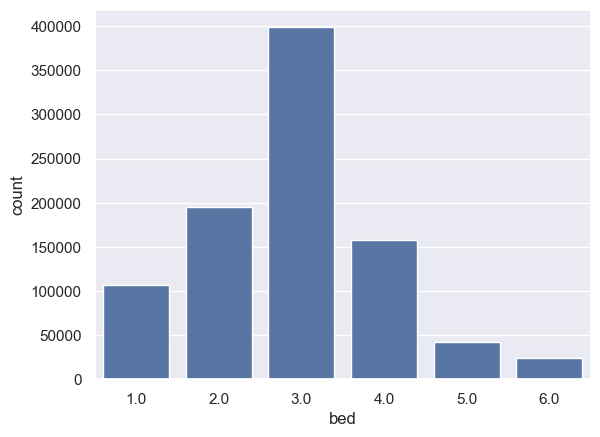

In [27]:
sns.countplot(x='bed', data=house_df)

<Axes: xlabel='bath', ylabel='count'>

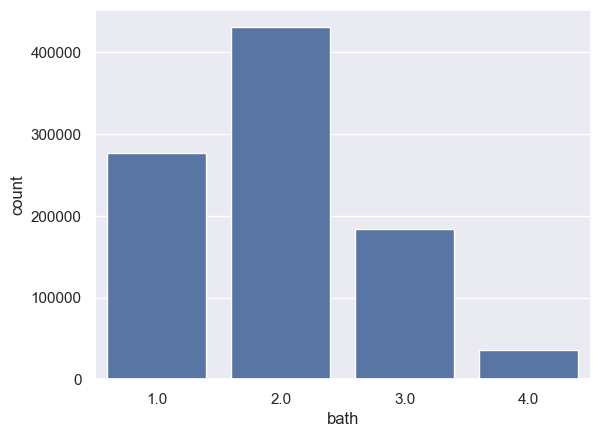

In [28]:
sns.countplot(x='bath', data=house_df)

In [29]:
house_df['status'].value_counts()

status
for_sale          924810
ready_to_build      1290
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='price'>

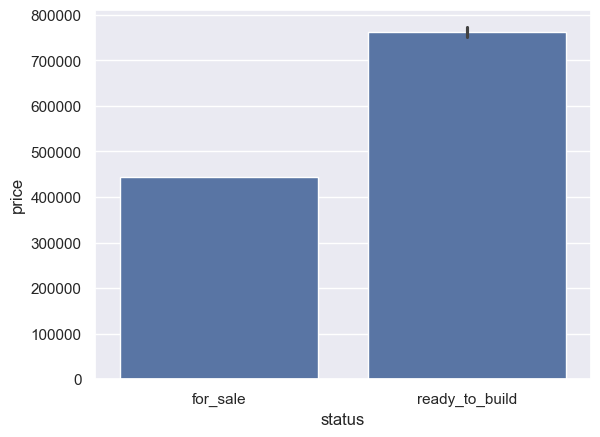

In [30]:
sns.barplot(x='status', y='price', data=house_df)

In [31]:
house_df['city'].value_counts()

city
New York City          33893
New York               29702
Brooklyn               22244
Boston                 19520
Bronx                  18763
                       ...  
Eleanor Ct                 1
T3 R12 Wels                1
Greenfield Township        1
Cragsmoor                  1
Cuba                       1
Name: count, Length: 3052, dtype: int64

<Axes: xlabel='state', ylabel='price'>

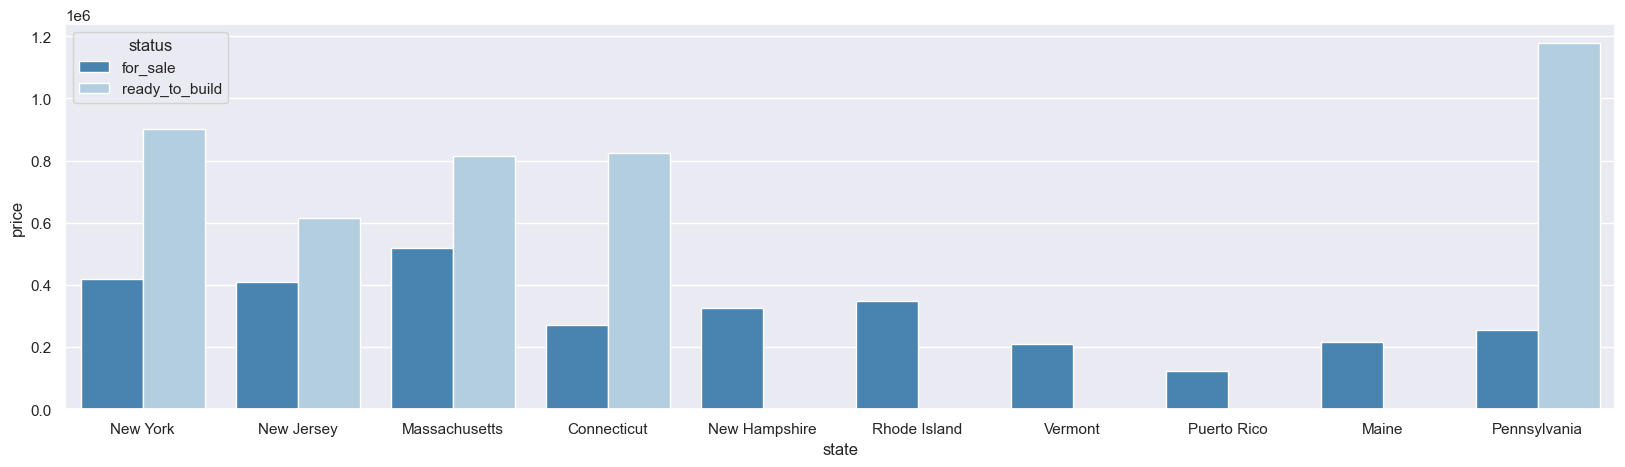

In [32]:
plt.figure(figsize=(20, 5))
sns.barplot(x='state', y='price', data=house_df, estimator=np.median, errorbar=None, order=house_df['state'].value_counts().index[:10], palette='Blues_r', hue='status')

<Axes: xlabel='acre', ylabel='Count'>

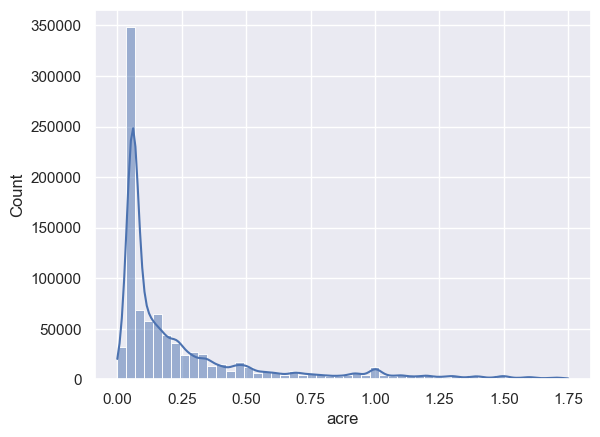

In [33]:
sns.histplot(x='acre', data=house_df, bins=50, kde=True)

<Axes: xlabel='price', ylabel='Count'>

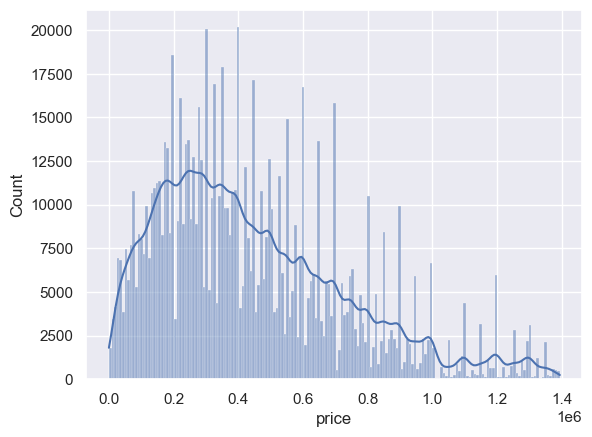

In [34]:
sns.histplot(x='price', data=house_df, kde=True)

In [35]:
house_df['city'].value_counts().head(20)

city
New York City    33893
New York         29702
Brooklyn         22244
Boston           19520
Bronx            18763
Philadelphia      9640
Jersey City       9564
Syracuse          8379
Flushing          7604
Staten Island     7131
Jamaica           6688
Albany            6124
Yonkers           5843
Forest Hills      5484
Newark            4906
Colonie           4242
Fort Lee          4169
Manhattan         4077
Schenectady       4025
Utica             3965
Name: count, dtype: int64

In [36]:
house_df['city'] = house_df['city'].str.replace('New York City', 'New York')

<Axes: xlabel='city', ylabel='price'>

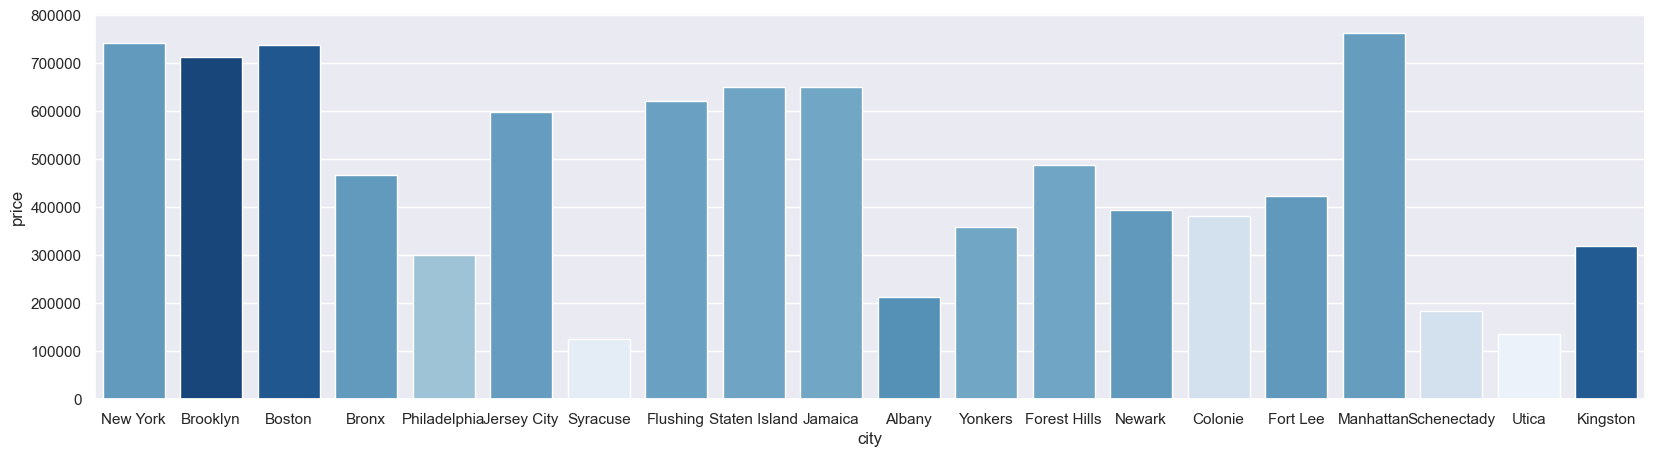

In [37]:
# Distribution of top 10 cities

plt.figure(figsize=(20, 5))
sns.barplot(x='city', y='price', data=house_df, errorbar=None, order=house_df['city'].value_counts().index[:20], palette='Blues_r', hue='city')

<Axes: xlabel='state', ylabel='price'>

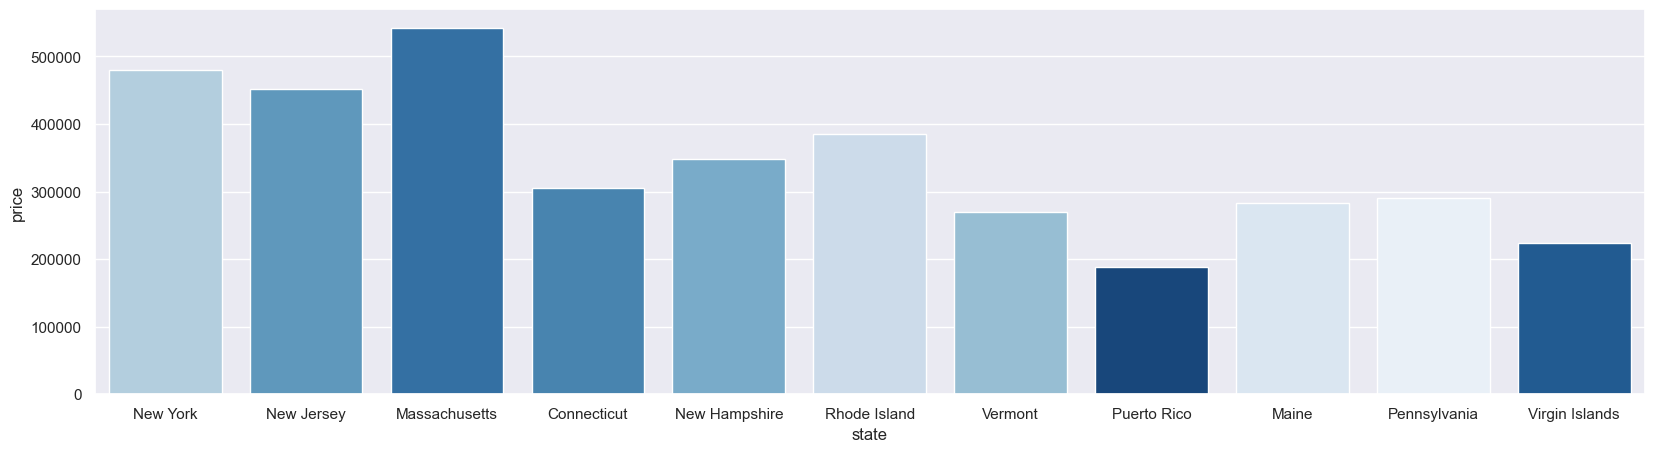

In [38]:
plt.figure(figsize=(20, 5))
sns.barplot(x='state', y='price', data=house_df, errorbar=None, order=house_df['state'].value_counts().index[:20], palette='Blues_r', hue='state')

In [39]:
house_df.groupby('city')['bed'].count().sort_values(ascending=False).head(20).reset_index()

,city,bed
0,New York,63595
1,Brooklyn,22244
2,Boston,19520
3,Bronx,18763
4,Philadelphia,9640
5,Jersey City,9564
6,Syracuse,8379
7,Flushing,7604
8,Staten Island,7131
9,Jamaica,6688


<Axes: xlabel='city', ylabel='bed'>

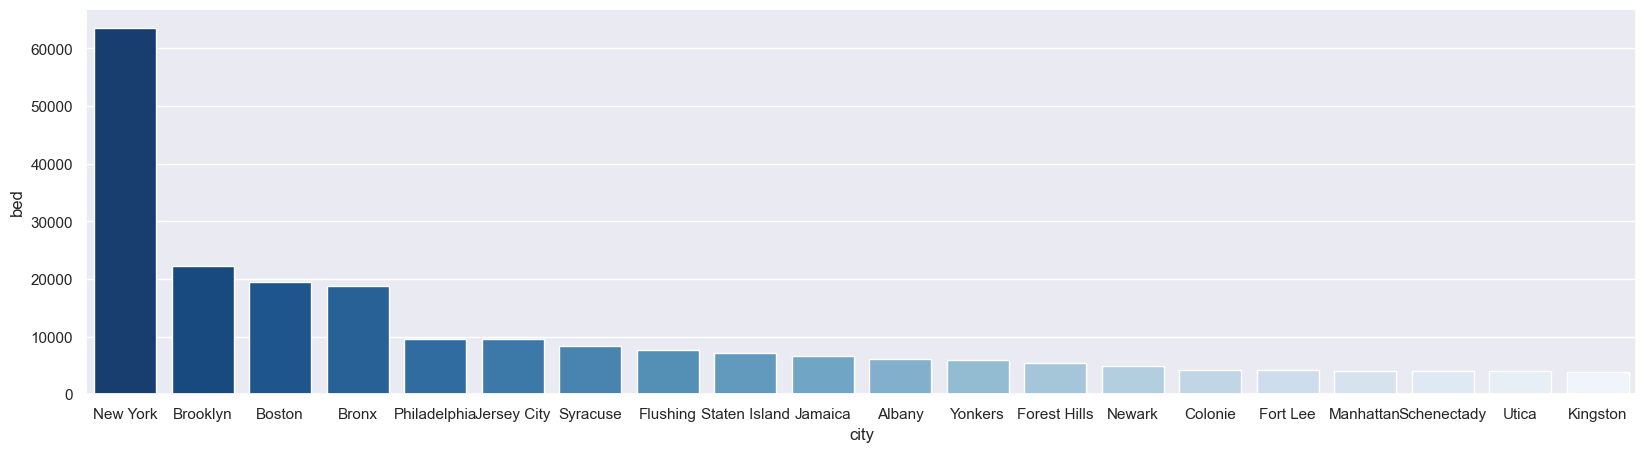

In [40]:
# Top 10 cities with total beds

plt.figure(figsize=(20, 5))
sns.barplot(x='city', y='bed', data=house_df.groupby('city')['bed'].count().sort_values(ascending=False).head(20).reset_index(), 
            errorbar=None, order=house_df['city'].value_counts().index[:20], palette='Blues_r', hue='city')

In [41]:
house_df.groupby('city')['bath'].count().sort_values(ascending=False).head(20).reset_index()

,city,bath
0,New York,63595
1,Brooklyn,22244
2,Boston,19520
3,Bronx,18763
4,Philadelphia,9640
5,Jersey City,9564
6,Syracuse,8379
7,Flushing,7604
8,Staten Island,7131
9,Jamaica,6688


<Axes: xlabel='city', ylabel='bath'>

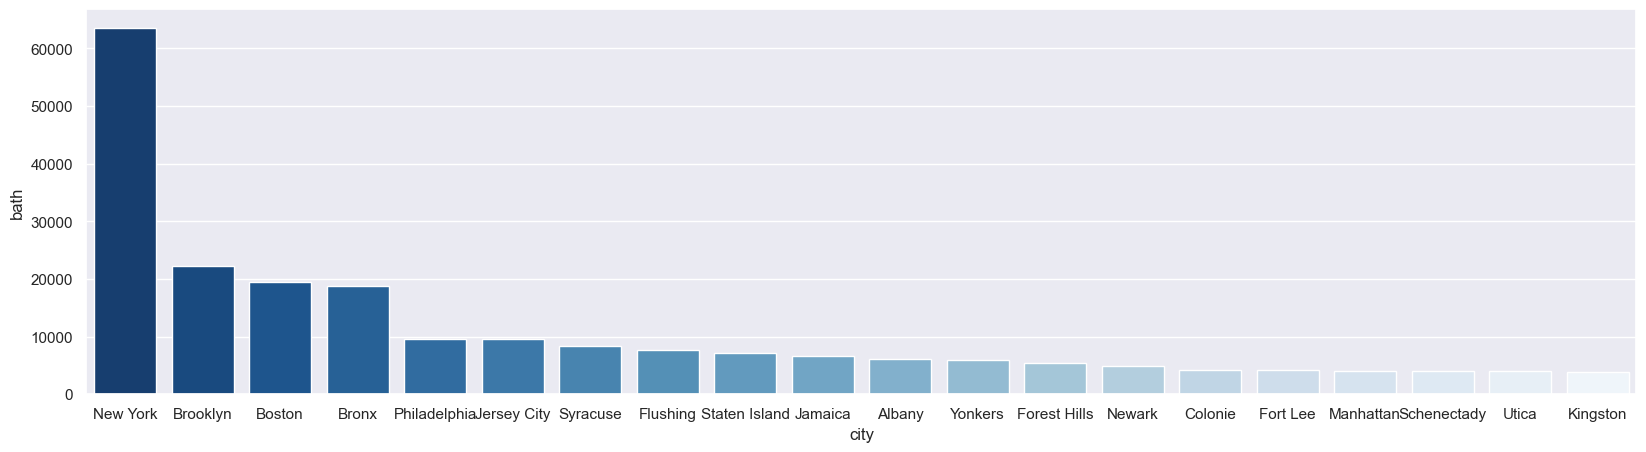

In [42]:
# Top 10 cities with total baths

plt.figure(figsize=(20, 5))
sns.barplot(x='city', y='bath', data=house_df.groupby('city')['bath'].count().sort_values(ascending=False).head(20).reset_index(), 
            errorbar=None, order=house_df['city'].value_counts().index[:20], palette='Blues_r', hue='city')

In [43]:
# Top 10 cities with highest mean of bed and bath
top_10 = house_df.groupby('city')[['bed', 'bath']].mean().sort_values(by=['bed','bath'], ascending=False).head(10).reset_index()
top_10

,city,bed,bath
0,Oueens,6.000000,3.000000
1,Orocovis,5.600000,3.650000
2,Canarsie,5.487179,1.871795
3,Huntington Sta,5.250000,2.000000
4,Russell,5.117647,2.000000
5,Rupert,5.000000,4.000000
6,Van Etten,5.000000,4.000000
7,Winslow Township,5.000000,4.000000
8,Buena Vista Township,5.000000,3.000000
9,Circleville,5.000000,3.000000


<Axes: xlabel='city', ylabel='bath'>

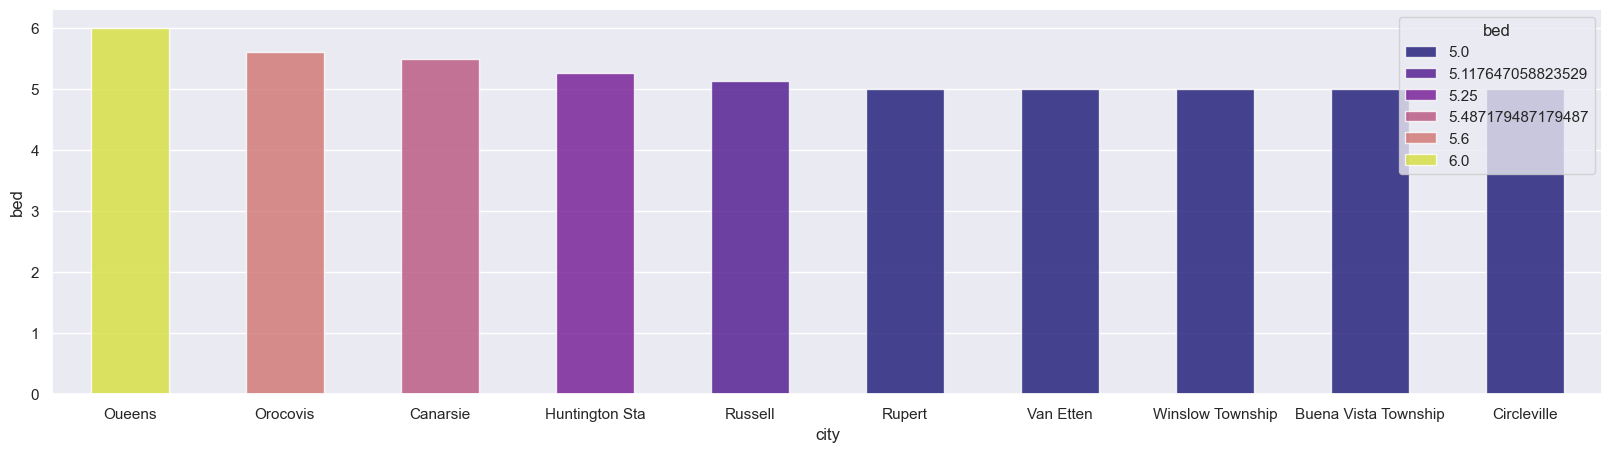

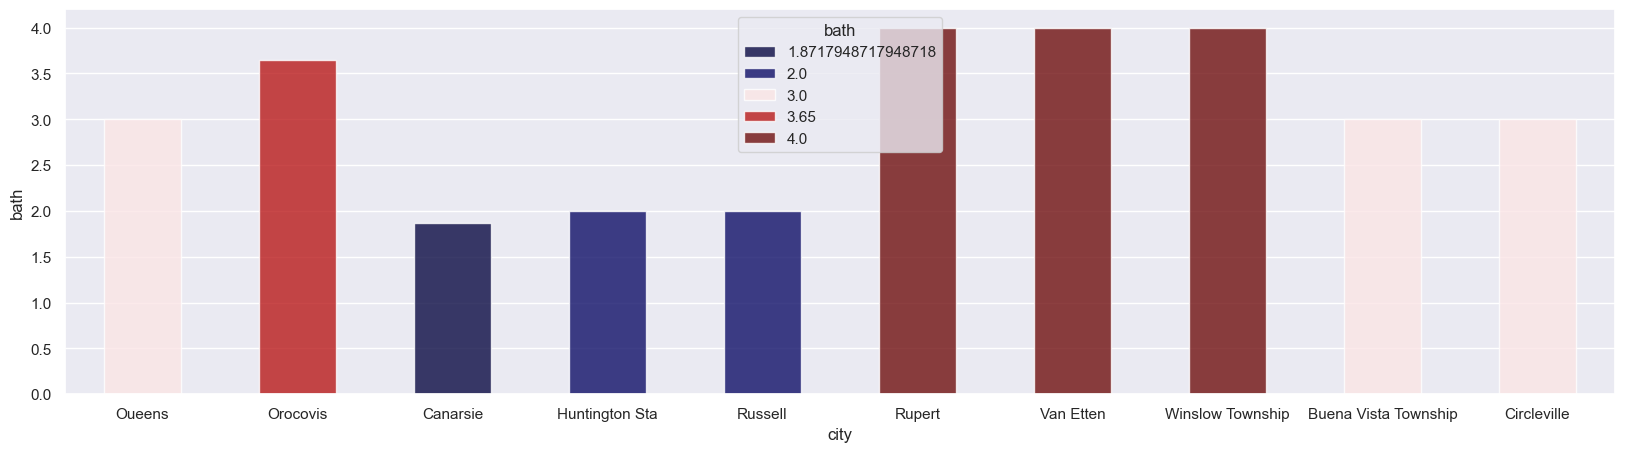

In [44]:

plt.figure(figsize=(20, 5))
sns.barplot(x='city', y='bed', data=top_10, errorbar=None, order=top_10['city'], palette= 'plasma', hue='bed', alpha=0.8, width=0.5)
plt.figure(figsize=(20, 5))
sns.barplot(x='city', y='bath', data=top_10, errorbar=None, order=top_10['city'], palette='seismic', hue='bath', alpha=0.8, width=0.5)

<Axes: xlabel='size', ylabel='Count'>

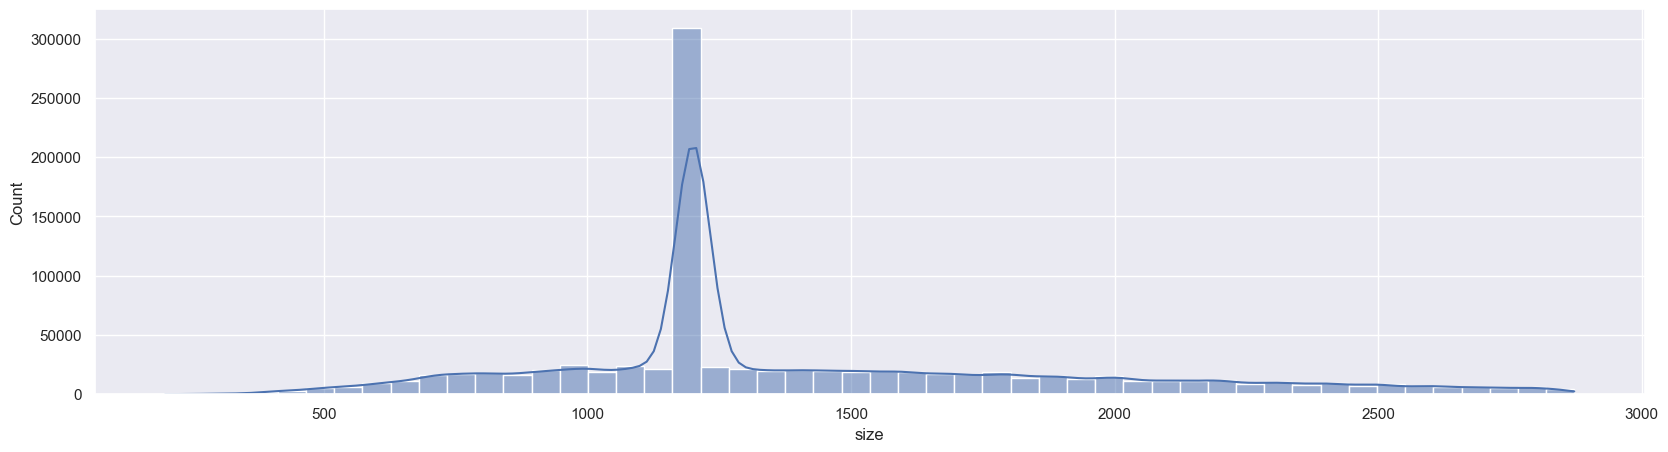

In [45]:
plt.figure(figsize=(20, 5))
sns.histplot(house_df['size'], bins=50 ,kde=True)

In [46]:
house_df.groupby('state')['size'].mean().round(2).sort_values(ascending=False).head(20).reset_index()

,state,size
0,New Hampshire,1552.69
1,Connecticut,1544.16
2,Vermont,1494.17
3,Pennsylvania,1466.51
4,Massachusetts,1464.93
5,Rhode Island,1463.12
6,Maine,1442.91
7,New York,1383.16
8,Puerto Rico,1339.88
9,New Jersey,1335.71


<Axes: xlabel='state', ylabel='size'>

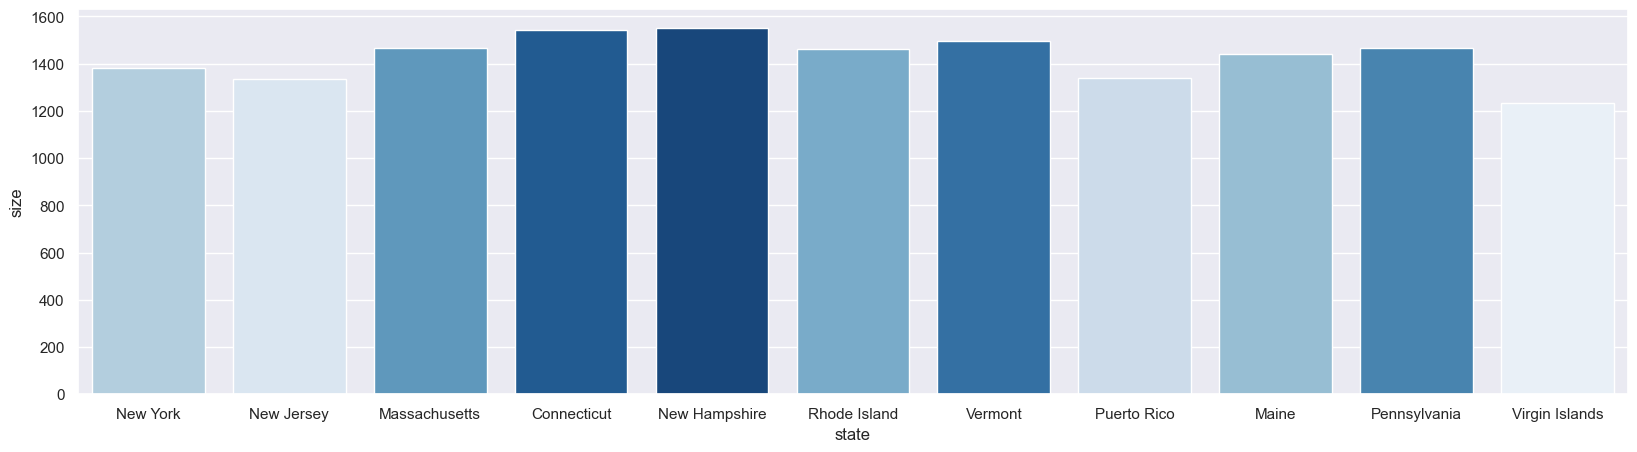

In [47]:
plt.figure(figsize=(20, 5))
sns.barplot(x='state', y='size', data=house_df.groupby('state')['size'].mean().round(2).sort_values(ascending=False).head(20).reset_index(), 
            errorbar=None, order=house_df['state'].value_counts().index, palette='Blues_r', hue='state')

In [48]:
house_df.groupby('city')['size'].mean().round(2).sort_values(ascending=False).head(10).reset_index()

,city,size
0,Mountainville,2872.0
1,Frye Island,2856.0
2,Barnet,2839.0
3,Dunstable,2818.0
4,Lake Clear,2816.0
5,Bow,2806.0
6,Devon,2805.0
7,South Bristol,2800.0
8,West Coxsackie,2800.0
9,Mount Pleasant,2800.0


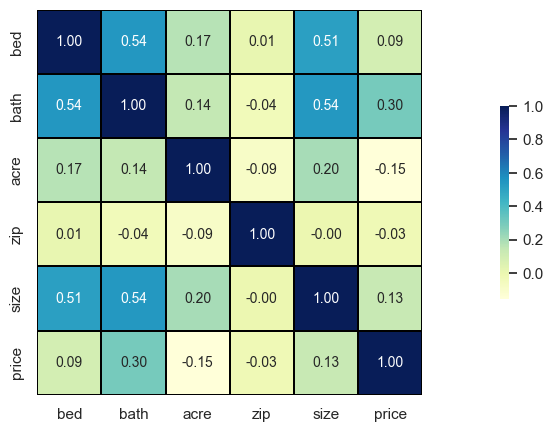

In [49]:
plt.figure(figsize=(20, 5))
sns.heatmap(house_df[numerical_features].corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.2, linecolor='black', square=True, cbar_kws={"shrink": .5}, annot_kws={"size": 10})
plt.show()

In [50]:
house_df.groupby('price')['size'].mean().round(2).sort_values(ascending=False).reset_index()

,price,size
0,1370995.0,2872.00
1,912000.0,2868.00
2,546270.0,2867.00
3,545770.0,2867.00
4,540270.0,2867.00
...,...,...
5677,741520.0,400.00
5678,219777.0,375.00
5679,79483.0,336.00
5680,24999.0,334.43


<Axes: xlabel='size', ylabel='price'>

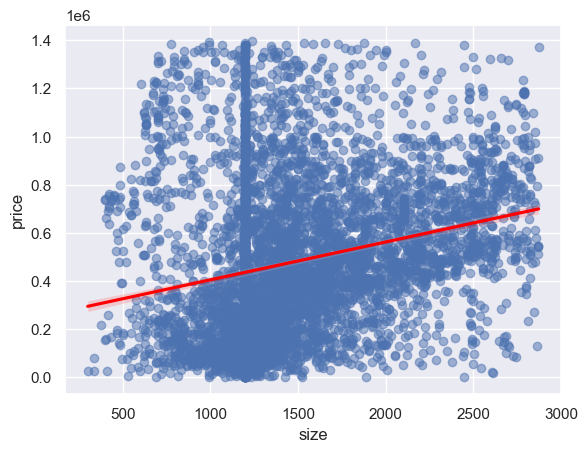

In [51]:
sns.regplot(x='size', y='price', data=house_df.groupby('price')['size'].mean().round(2).sort_values(ascending=False).reset_index(), scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

## Model Building

#### Data Preprocessing

In [109]:
df = house_df.copy()

In [110]:
sample = df.sample(1000)

In [111]:
sample

,status,bed,bath,acre,city,state,zip,size,price
689298,for_sale,3.0,2.0,1.00,Newfield,New Jersey,8344.0,1350.0,249000.0
476669,for_sale,3.0,2.0,0.06,Linden,New Jersey,7036.0,1200.0,269000.0
926311,for_sale,4.0,2.0,0.39,Beacon,New York,12508.0,1896.0,500000.0
1349752,for_sale,3.0,2.0,0.71,Oriskany Falls,New York,13425.0,1200.0,12000.0
1313096,for_sale,3.0,2.0,0.10,Seneca Falls,New York,13148.0,1114.0,95000.0
...,...,...,...,...,...,...,...,...,...
587853,for_sale,3.0,2.0,0.74,Stillwater,New Jersey,7860.0,1200.0,329000.0
509177,for_sale,3.0,3.0,0.06,Jersey City,New Jersey,7307.0,1200.0,699000.0
1086182,for_sale,4.0,3.0,0.09,Howard Beach,New York,11414.0,1200.0,799000.0
1376244,for_sale,3.0,2.0,1.10,Big Moose,New York,13331.0,1200.0,39500.0


In [112]:
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
X[:, 0] = enc.fit_transform(X[:, 0])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [4,5])], remainder='passthrough')
X = ct.fit_transform(X)

##### Feature Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1, 1))

#### Model Training

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Multiple Linear Regression

In [122]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score
print('R2-score: ', r2_score(y_test, y_pred))

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))


R2-score:  -1.8506423406510654e+29
MSE:  1.9279902004153516e+29
MAE:  221415245490462.4


##### Lasso Regression

In [128]:
# Lasso regression

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('R2-score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-score:  -0.003756596766949283
MSE:  1.045708746449688
MAE:  0.7973035838316256


#### SVR

In [129]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}

# Create the SVR model
reg = SVR()

# Perform grid search cv
grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel())

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new SVR model with the best parameters
best_reg = SVR(**best_params)
best_reg.fit(X_train, y_train.ravel())

# Predict the target variable using the best model
y_pred = best_reg.predict(X_test)

print('R2-score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-score:  0.5179483891641725
MSE:  0.5021990264520511
MAE:  0.547117264262474


#### Decision Tree Regression

In [123]:
# Decision tree using grid search cv
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the decision tree regressor
reg = DecisionTreeRegressor()

# Perform grid search cv
grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new decision tree regressor with the best parameters
best_reg = DecisionTreeRegressor(**best_params)
best_reg.fit(X_train, y_train)

# Predict the target variable using the best model
y_pred = best_reg.predict(X_test)

print('R2-score: ' ,r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-score:  0.5343929132582625
MSE:  0.4850672011352555
MAE:  0.5259930099912081


##### Random Forest Regression

In [134]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(max_depth=5, n_estimators=100 ,random_state=0)
RF.fit(X_train, y_train.ravel())

y_pred = RF.predict(X_test)

print('R2-score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2-score:  0.5514556100518039
MSE:  0.4672913665031392
MAE:  0.5189390312354402


##### XGBoost Regression

In [139]:
# XGBoost regression
from xgboost import XGBRegressor

# Create the XGBoost model
reg = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Fit the model
reg.fit(X_train, y_train)

# Predict the target variable
y_pred = reg.predict(X_test)

# Evaluate the model
print('R2-score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))


R2-score:  0.6461361890948307
MSE:  0.3686535991966875
MAE:  0.46842651853859185


The best model is XGBoost with an R2 score of 65 % on the testing data.

__________________

--------------